In [1]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np
# Gráficos
# ==============================================================================
import seaborn as sns
import matplotlib.pyplot as plt
# Gráfico de distribución para cada variable numérica
import matplotlib.ticker as ticker
# ==============================================================================
# Identificador de tipos de Distribucion
# ==============================================================================
from fitter import Fitter, get_common_distributions
# ==============================================================================
url = "C:/Users/and14/Desktop/Proyectos/Programacion/Python/2022/Practica_20220831_ML/00_Data_Sets/SaratogaHouses.csv"

datos = pd.read_csv(url, sep=",")

# Se renombran las columnas para que sean más descriptivas
datos.columns = ["precio", "metros_totales", "antiguedad", "precio_terreno",
                 "metros_habitables", "universitarios", "dormitorios", 
                 "chimenea", "banyos", "habitaciones", "calefaccion",
                 "consumo_calefacion", "desague", "vistas_lago",
                 "nueva_construccion", "aire_acondicionado"]
#Limpiar datos
datos = datos.fillna(0)

# Se convierte la variable chimenea tipo string
# ==============================================================================
datos.chimenea = datos.chimenea.astype("str")

def tidy_corr_matrix(corr_mat):
    '''
    Función para convertir una matrix de correlación de pandas en formato tidy
    '''
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','r']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)
    return(corr_mat)
    
corr_matrix = datos.select_dtypes(include=['float64', 'int']).corr(method='pearson')
dic_replace = {'2': "2_mas",
               '3': "2_mas",
               '4': "2_mas"}

datos['chimenea'] = datos['chimenea'] \
                     .map(dic_replace) \
                     .fillna(datos['chimenea'])

Primera Linea para llegar al final del Ejercicio

In [ ]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
# ==============================================================================
url = "C:/Users/and14/Desktop/Proyectos/Programacion/Python/2022/Practica_20220831_ML/00_Data_Sets/SaratogaHouses.csv"

datos = pd.read_csv(url, sep=",")

# Se renombran las columnas para que sean más descriptivas
datos.columns = ["precio", "metros_totales", "antiguedad", "precio_terreno",
                 "metros_habitables", "universitarios", "dormitorios", 
                 "chimenea", "banyos", "habitaciones", "calefaccion",
                 "consumo_calefacion", "desague", "vistas_lago",
                 "nueva_construccion", "aire_acondicionado"]

In [ ]:
#Limpiar datos
datos = datos.fillna(0) # a los valores nullos se le coloca 0 

La variable chimenea, aunque es de tipo numérico, apenas toma unos pocos valores y 
la gran mayoría de observaciones pertenecen a solo dos de ellos. 
En casos como este, suele ser conveniente tratar la variable como cualitativa.

In [ ]:
# Se convierte la variable chimenea tipo string
# ==============================================================================
datos.chimenea = datos.chimenea.astype("str")

In [ ]:
# Variables cualitativas (tipo object)
# ==============================================================================
datos.select_dtypes(include=['object']).describe()

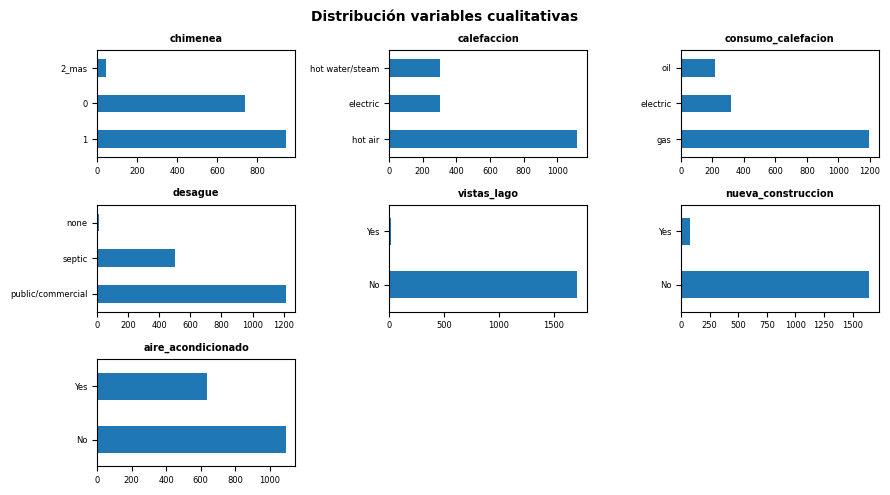

In [2]:
# Gráfico para cada variable cualitativa
# ==============================================================================
import seaborn as sns
import matplotlib.pyplot as plt
# ==============================================================================
# Tratamiento de datos
# ==============================================================================
import numpy as np
# ==============================================================================
# ==============================================================================
# Ajustar número de subplots en función del número de columnas
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(9, 5))
axes = axes.flat
columnas_object = datos.select_dtypes(include=['object']).columns

for i, colum in enumerate(columnas_object):
    datos[colum].value_counts().plot.barh(ax = axes[i])
    axes[i].set_title(colum, fontsize = 7, fontweight = "bold")
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel("")

# Se eliminan los axes vacíos
for i in [7,8]:
    fig.delaxes(axes[i])
    
fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Distribución variables cualitativas',
             fontsize = 10, fontweight = "bold");

Si alguno de los niveles de una variable cualitativa tiene muy pocas observaciones en comparación a los otros niveles, puede ocurrir que, durante la validación cruzada o bootstrapping, algunas particiones no contengan ninguna observación de dicha clase (varianza cero), lo que puede dar lugar a errores. En estos casos, suele ser conveniente:

Eliminar las observaciones del grupo minoritario si es una variable multiclase.

Eliminar la variable si solo tiene dos niveles.

Agrupar los niveles minoritarios en un único grupo.

Asegurar que, en la creación de las particiones, todos los grupos estén representados en cada una de ellas.

In [ ]:
# Setear valores cualitativos
datos.chimenea.value_counts().sort_index()

In [ ]:
dic_replace = {'2': "2_mas",
               '3': "2_mas",
               '4': "2_mas"}

datos['chimenea'] = datos['chimenea'] \
                     .map(dic_replace) \
                     .fillna(datos['chimenea'])

# Setear valores cualitativos
datos.chimenea.value_counts().sort_index()

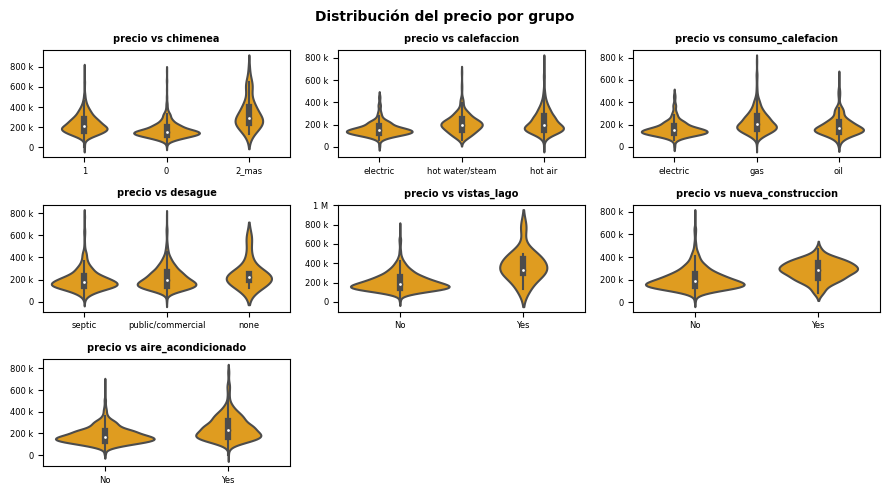

In [2]:
# Gráfico relación entre el precio y cada cada variables cualitativas
import matplotlib.ticker as ticker
# ==============================================================================
# Ajustar número de subplots en función del número de columnas
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(9, 5))
axes = axes.flat
columnas_object = datos.select_dtypes(include=['object']).columns

for i, colum in enumerate(columnas_object):
    sns.violinplot(
        x     = colum,
        y     = 'precio',
        data  = datos,
        color = "orange",
        ax    = axes[i]
    )
    axes[i].set_title(f"precio vs {colum}", fontsize = 7, fontweight = "bold")
    axes[i].yaxis.set_major_formatter(ticker.EngFormatter())
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

# Se eliminan los axes vacíos
for i in [7, 8]:
    fig.delaxes(axes[i])
    
fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Distribución del precio por grupo', fontsize = 10, fontweight = "bold");